## **Задание 1 - Нелинейная регрессия**

In [3]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

In [100]:
x=[0.1,0.10808081,0.11616162,0.12424242,0.13232323,0.14040404,
   0.14848485,0.15656566,0.16464646,0.17272727,0.18080808,
   0.18888889,0.1969697,0.20505051,0.21313131,0.22121212,
   0.22929293,0.23737374,0.24545455,0.25353535,0.26161616,
   0.26969697,0.27777778,0.28585859,0.29393939,0.3020202,
   0.31010101,0.31818182,0.32626263,0.33434343,0.34242424,
   0.35050505,0.35858586,0.36666667,0.37474747,0.38282828,
   0.39090909,0.3989899,0.40707071,0.41515152,0.42323232,
   0.43131313,0.43939394,0.44747475,0.45555556,0.46363636,
   0.47171717,0.47979798,0.48787879,0.4959596,0.5040404,
   0.51212121,0.52020202,0.52828283,0.53636364,0.54444444,
   0.55252525,0.56060606,0.56868687,0.57676768,0.58484848,
   0.59292929,0.6010101,0.60909091,0.61717172,0.62525253,
   0.63333333,0.64141414,0.64949495,0.65757576,0.66565657,
   0.67373737,0.68181818,0.68989899,0.6979798,0.70606061,
   0.71414141,0.72222222,0.73030303,0.73838384,0.74646465,
   0.75454545,0.76262626,0.77070707,0.77878788,0.78686869,
   0.79494949,0.8030303,0.81111111,0.81919192,0.82727273,
   0.83535354,0.84343434,0.85151515,0.85959596,0.86767677,
   0.87575758,0.88383838,0.89191919,0.9]

y = [-2.24812911, -2.30215341, -2.34463875, -2.38651064,
     -2.43190693, -2.44713884, -2.49003176, -2.51006098, 
     -2.55831541, -2.57056931, -2.59340317, -2.64026441, 
     -2.65975636, -2.69517476, -2.71046599, -2.74422696, 
     -2.76251291, -2.79505506, -2.79301352, -2.82852207, 
     -2.854651, -2.88654236, -2.92345136, -2.91943321, 
     -2.94240833, -2.9487781, -2.97926813, -2.99198343, 
     -3.03396292, -3.03814694, -3.04944858, -3.07196161, 
     -3.09883706, -3.11338258, -3.11898122, -3.14254571, 
     -3.18330957, -3.17453301, -3.20021237, -3.21213539, 
     -3.23715191, -3.24017664, -3.23640684, -3.26147762, 
     -3.28208909, -3.29453546, -3.31160478, -3.33188752, 
     -3.33320305, -3.35238927, -3.34176317, -3.37471911, 
     -3.37543159, -3.40452694, -3.40505804, -3.43358858, 
     -3.43596139, -3.43705603, -3.45264647, -3.46029402, 
     -3.45723979, -3.4720453, -3.47597438, -3.4795529, 
     -3.50118552, -3.5031452, -3.5097196, -3.51083668, 
     -3.51128397, -3.52708836, -3.5222885, -3.53317295, 
     -3.50965143, -3.51939652, -3.51659198, -3.50734187, 
     -3.50882329, -3.48129755, -3.49384658, -3.48813707, 
     -3.48345018, -3.46180698, -3.44784696, -3.42372263, 
     -3.39080674, -3.37867045, -3.35281766, -3.32575498, 
     -3.28934964, -3.26814804, -3.23547615, -3.1707224, 
     -3.12910072, -3.09300443, -3.02523152, -2.9453774, 
     -2.89454317, -2.83662685, -2.75433056, -2.68946573]

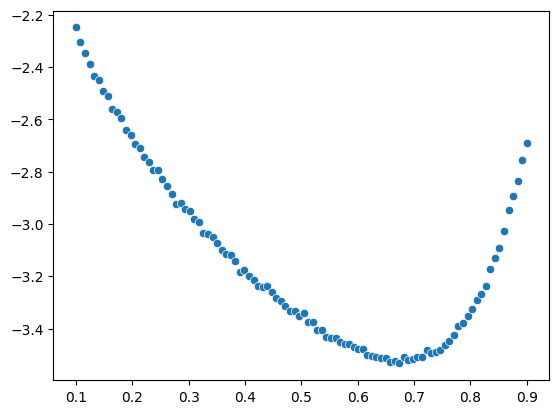

In [101]:
sns.scatterplot(x = x,y=y)
plt.show()

In [102]:
def func(x, w1,w2,w3,w4):
    return w1*np.power(x,w2)+w3*np.power(x,w4)

In [109]:
popt, pcov = curve_fit(func, x, y, p0=np.zeros(shape=(4)))

popt

array([ 3.00860854,  8.58447159, -3.9962949 ,  0.24936605])

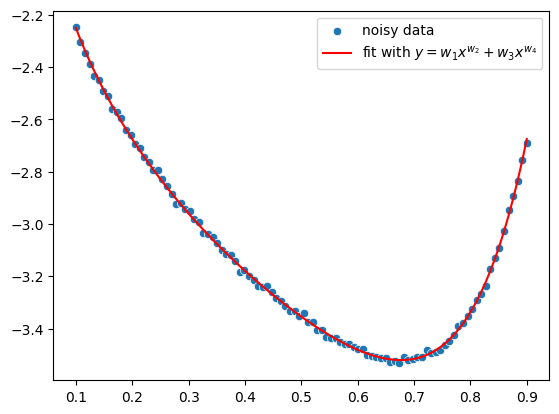

In [114]:
sns.scatterplot(x=x,y=y, label="noisy data")
plt.plot(x,func(x,*popt), "r-", label=r"fit with $y=w_1x^{w_2}+w_3x^{w_4}$")
plt.legend()
plt.show()

Визуально убеждаемся, что переобучения не наблюдается, так как фиттируемая кривая не искривляется в угоду тренировочным данным (как было в примере на семинаре). Вообще такое поведение было бы крайне сложно получить ввиду простоты вида фиттируемой функции ($y=w_1x^{w_2}+w_3x^{w_4}$). Если бы подобных слагаемых было большое количество (хотя бы более 10), тогда без регуляризации могли бы появиться признаки переобучения - взрыв весов, искривление графика.

## **Задание 2 - американские горки**

In [136]:
eps = 10**(-6)

In [137]:
def f1(x):
    return x * np.exp(-x**2/2)

def f2(x):
    return 2*x**2-np.log(x)

In [166]:
def dichotomy(eps, a,b,f):
    count = 0
    while b-a > eps:
        c = (b+a)/2
        if f(c+eps) > f(c-eps):
            b = c
        else:
            a = c
        count+=1
    return (b+a)/2, count, b-a


In [197]:
def get_fib_nums(N):
    a, b = 1, 1

    for _ in range(N):
        yield a
        a, b = b, a + b

In [198]:
def fibonacci(n, a,b,f):
    
    N=n+3

    fib_nums = np.array(list(get_fib_nums(N)))

    x1 = a + (fib_nums[N-3] / fib_nums[N-1]) * (b-a)
    x2 = a + (fib_nums[N-2] / fib_nums[N-1]) * (b-a)

    f_1 = f(x1)
    f_2 = f(x2)

    while N>3:
        N-=1
        if f_1 < f_2:
            b = x2
            x2 = x1
            f_2 = f_1
            x1 = a + (fib_nums[N-3] / fib_nums[N-1]) * (b-a)
            f_1 = f(x1)
        else:
            a = x1
            x1 = x2
            f_1 = f_2
            x2 = a + (fib_nums[N-2] / fib_nums[N-1]) * (b-a)
            f_2 = f(x2)

    return (a+b) / 2, b-a

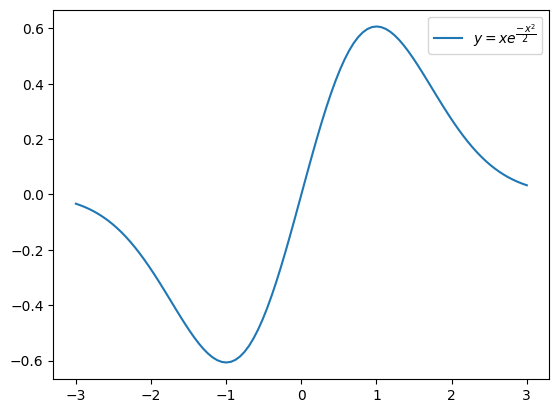

In [151]:
plt.plot(np.linspace(-3,3,100), f1(np.linspace(-3,3,100)), label=r"$y = x e^{\dfrac{-x^2}{2}}$")

plt.legend()

In [158]:
x_min,n_iter,err = dichotomy(eps, -3,3,f1)

x_min,n_iter,err

(-1.0000001192092896, 23, 7.152557373046875e-07)

In [199]:
x_min, err = fibonacci(23,-3,3,f1)

x_min, err

(-1.0000164754145624, 9.885248737562247e-05)

При одинаковом количестве итераций (23) дихотомия оказалась точнее, чем метод Фибоначчи на 2-3 порядка

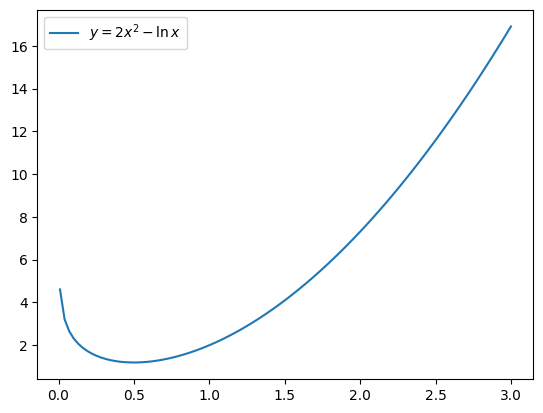

In [164]:
plt.plot(np.linspace(0.01,3,100), f2(np.linspace(0.01,3,100)), label=r"$y = 2x^2-\ln{x}$")

plt.legend()

In [168]:
x_min,n_iter,err = dichotomy(eps, 0.01,3,f2)

x_min,n_iter,err

(0.4999997460842132, 22, 7.128715514559403e-07)

In [200]:
x_min,err = fibonacci(22,0.01,3,f2)

x_min,err

(0.49999733422192616, 7.970676441187985e-05)

Аналогично дихотомия на 2 порядка точнее при одинаковом количестве итераций

## **Задание 3 - Функция Растригина**

In [201]:
from scipy.optimize import minimize

In [219]:
def rastrigin(arr, sign):
    return sign*(20+arr[0]**2+arr[1]**2-10*np.cos(2*np.pi*arr[0])-10*np.cos(2*np.pi*arr[1]))

In [259]:
x1_arr = np.linspace(-5,5,100)
x2_arr = np.linspace(-5,5,100)

x_min_arr = []
x_max_arr = []

for x1 in x1_arr:
    for x2 in x2_arr:
        x_min_arr.append(minimize(rastrigin,x0=[x1,x2], args=(1))["x"])
        x_max_arr.append(minimize(rastrigin,x0=[x1,x2], args=(-1))["x"])

In [260]:
x_max_arr = np.array(x_max_arr)
x_min_arr = np.array(x_min_arr)

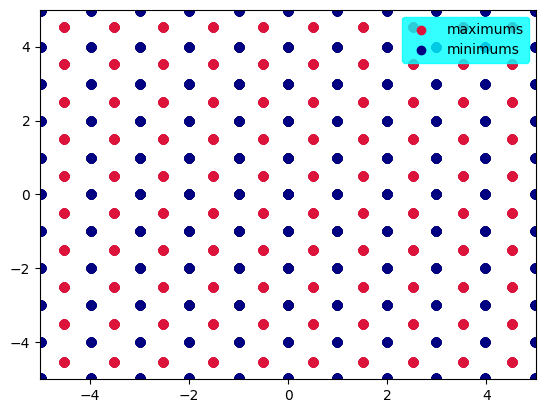

In [262]:
plt.scatter(x_max_arr[:,:1], x_max_arr[:,1:], color="crimson", label="maximums")
plt.scatter(x_min_arr[:,:1], x_min_arr[:,1:], color="navy", label="minimums")

plt.xlim(-5,5)
plt.ylim(-5,5)

plt.legend().get_frame().set_color("cyan")


## **Задание 4 - Градиенты градиентами**

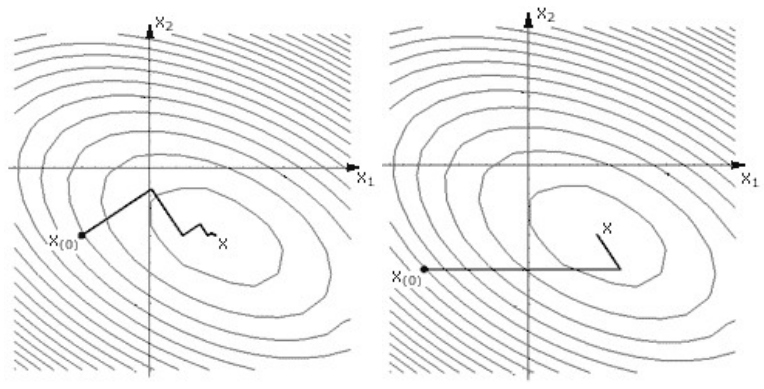


Замкнутые линии - кривые уровня функции (изолинии), минимум которой мы ищем. Если на рисунке 2 растянуть изолинии в окружности, то звенья ломаной спуска станут ортогональными (особенность метода сопряжённых градиентов).

**Рисунок 1:** наискорейший спуск, так как ломаная спуска имеет характерную особенность - ортогональные звенья. Также эти звенья ортогональны изолинии в точке начала звена и параллельны изолинии в точке конца звена.

**Рисунок 2:** метод сопряжённых градиентов, так как спуск сошёлся за $n=2$ шага, что соответствует размерности пространства иксов, а это является отличительной особенностью этого метода (так как приближаем яму квадратичной формой). Хотя вообще метод может сходиться и за чуть большее (но всё равно конечное) число шагов из-за неточности приближения ямы квадратичной формой.

Метод сопряжённых градиентов для ям, **описывающихся** квадратичными формами сходится **не более** чем за $n$ шагов, где $n$ - размерность пространства аргументов это формы (например, $\mathbb{R}^n$). Если же мы **приближаем** яму квадратичной формой, то шагов может быть и больше, чем $n$. Например, в семинарском ноутбуке метод сопряжёных градиентов сошёлся сошёлся за 4 шага при $n=2$

## **Задание 5 - Овальный**

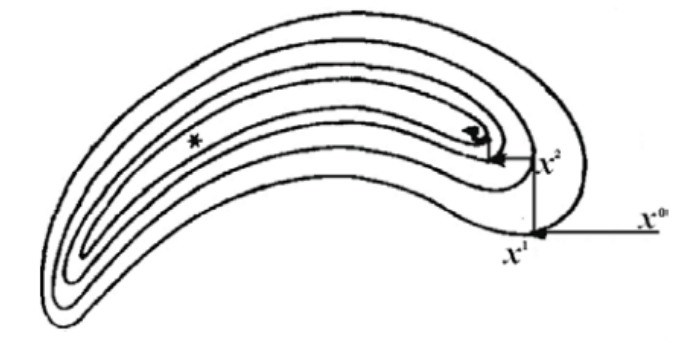


Овражный характер функции означает, что малое изменение некоторых переменных приводит к резкому изменению значения функции. Эта группа методов характеризует «склон оврага». По остальным переменным, задающим направление «дна оврага», функция меняется незначительно. Если точка лежит на «склоне оврага», то направление спуска из этой точки будет почти перпендикулярным к направлению «дна оврага», и в результате точки последовательности , полученные градиентным методом, будут поочередно находиться то на одном, то на другом «склоне оврага». Если «склоны оврага» достаточно круты, то такие скачки «со склона на склон» точек  могут сильно замедлить сходимость градиентного метода.

Чем более "овражна" функция, тем сильнее отличаются друг от друга максимальное и минимальное сингулярные числа матрицы. Геометрический смысл в том, что растяжение в одном направлении намного сильнее, чем в другом - отсюда и появляется "овраг".

Знаем, что в евклидовой норме число обусловленности матрицы $\mu_e(A) = \dfrac{\sigma_{max}(A)}{\sigma_{min}(A)}$, поэтому чем более "овражна" функция, тем больше число обусловленности.

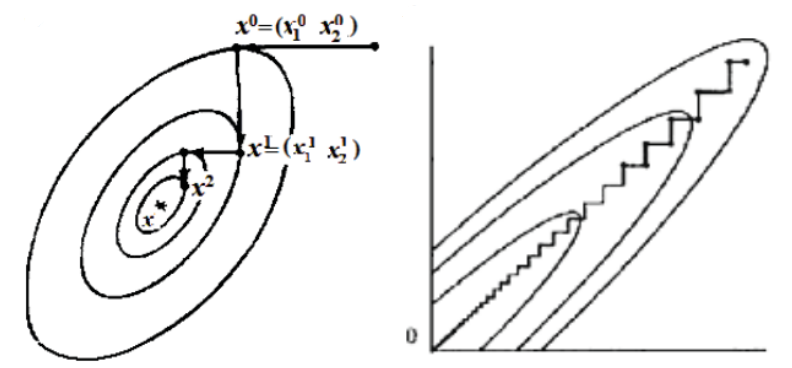 

**Вывод 0:** метод покоординатного спуска действительно какой-то убогий. 

**Вывод 1:** чем ближе "наклон" ямы к 45 градусам относительно осей координат (как на втором рисунке), тем больше итераций требуется для достижения минимума.

**Вывод 2:** При одинаковом "наклоне" ямы относительно осей координат чем яма более вытянута, тем больше итераций требуется чтобы сойтись к минимуму.

## **Задание 6 - Сопрягаемся**

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

In [14]:
def fletcher_reaves(r_new,r,s):
    return max(0, np.dot(r_new,r_new)/np.dot(r,r))

def hestens_shtifel(r_new,r,s):
    return max(0, np.dot(r_new,r_new-r)/np.dot(s,r_new-r))

def polak_ribier(r_new,r,s):
    return max(0, np.dot(r_new,r_new-r)/np.dot(r,r))

def fletcher(r_new,r,s):
    return max(0, np.dot(r_new,r_new)/np.dot(-s,r))

def lui_story(r_new,r,s):
    return max(0, np.dot(r_new,r_new-r)/np.dot(-s,r))

def dy_uan(r_new,r,s):
    return max(0, np.dot(r_new,r_new)/np.dot(s,r_new-r))

def hager_jang(r_new,r,s):
    return max(0, np.dot(r_new-r-2*s*np.dot(r_new-r,r_new-r)/np.dot(s,r_new-r), r_new/np.dot(s,r_new-r)))

In [265]:
def tang(x):
    return (x[0]**4-16*x[0]**2+5*x[0]+x[1]**4-16*x[1]**2+5*x[1])/2

def grad(x):
    return np.array([4*x[0]**3-32*x[0]+5, 4*x[1]**3-32*x[1]+5])/2

def conjugate_gradients(starting_point, algorythm, epsilon=10**(-6), iter_max = 1000):
    x = starting_point
    iterations = 0
    steps = [x]
    
    flag = 0

    r = -grad(x)
    S = r

    while iterations<iter_max:
        phi = lambda a: tang(x + a * S)
        alpha = minimize_scalar(phi).x
        x_new = x + alpha * S

        r_new = -grad(x_new)
        
        beta = algorythm(r_new,r,S)
        
        if flag:
            beta = 0

        S = r_new + beta * S

        iterations += 1
        steps.append(x_new)

        if (np.linalg.norm(x_new - x) < epsilon):
            if flag:
                x = x_new
                break
            else:
                flag = 1
                x = x_new
                r = r_new
                continue

        flag = 0
            
        x = x_new
        r = r_new

    return x, iterations, np.array(steps)

In [281]:
def show_path(algorythm, starting_point):

    # Генерация сетки для построения линий уровня
    x = np.linspace(-4, 0.2, 400)
    y = np.linspace(-4, -0.9, 400)
    X, Y = np.meshgrid(x, y)
    Z = (X**4-16*X**2+5*X+Y**4-16*Y**2+5*Y)/2

    # Вызов функции градиентного спуска
    min_point, iterations, steps = conjugate_gradients(starting_point,algorythm)

    # Построение графика
    plt.figure(figsize=(8, 6))
    plt.contourf(X, Y, Z, levels=10, cmap='viridis')
    plt.colorbar()

    # Построение линий уровня
    contour = plt.contour(X, Y, Z, levels=10, colors='black')

    # Подписи к линиям уровня
    plt.clabel(contour, colors='k', fmt='%2.1f', fontsize=12)

    # Построение шагов алгоритма
    for i in range(len(steps)-1):
        plt.arrow(steps[i][0], steps[i][1], steps[i+1][0] - steps[i][0], steps[i+1][1] - steps[i][1], 
                shape='full', lw=1, color='red', length_includes_head=True, head_width=0.05, zorder=4)

    # Подпись с количеством итераций
    plt.text(-3, -1, f'Iterations: {iterations}', color='white', fontsize=12)

    # Настройка осей и отображение
    plt.xlim([-4, 0.2])
    plt.ylim([-4, -0.9])
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Conjugate Gradients Visualization')
    plt.show()

Начальная точка $(0.1,-1)$

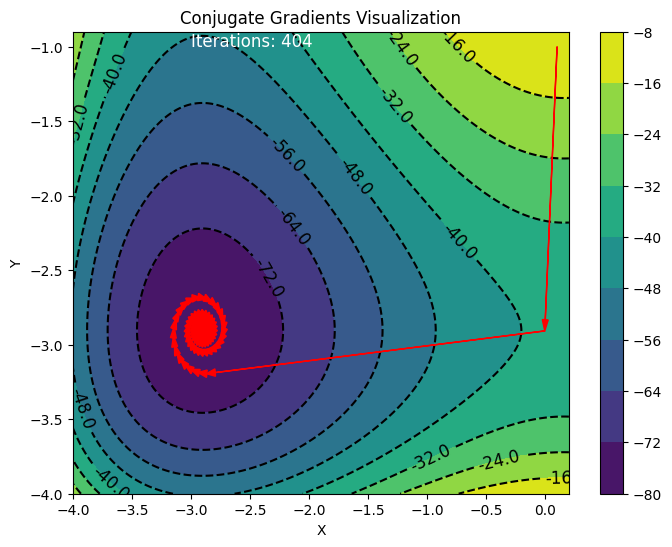

In [282]:
show_path(fletcher_reaves,(0.1,-1))

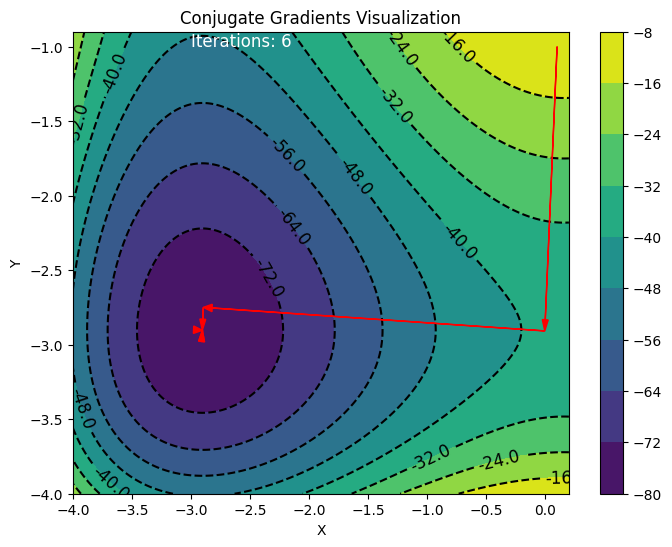

In [283]:
show_path(hestens_shtifel,(0.1,-1))

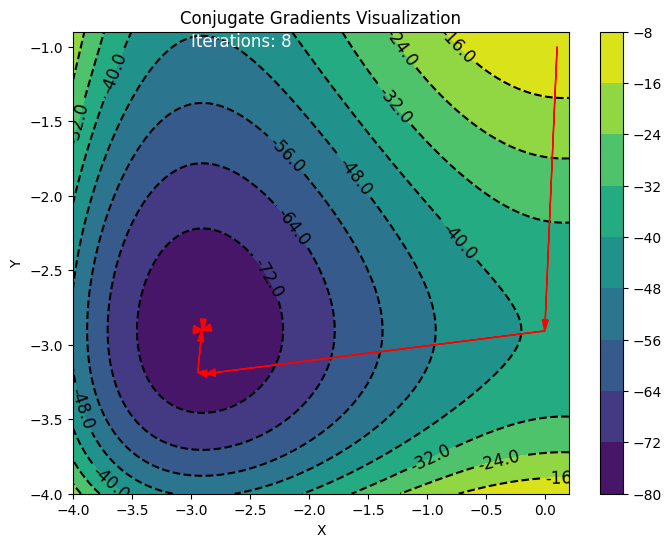

In [284]:
show_path(polak_ribier,(0.1,-1))

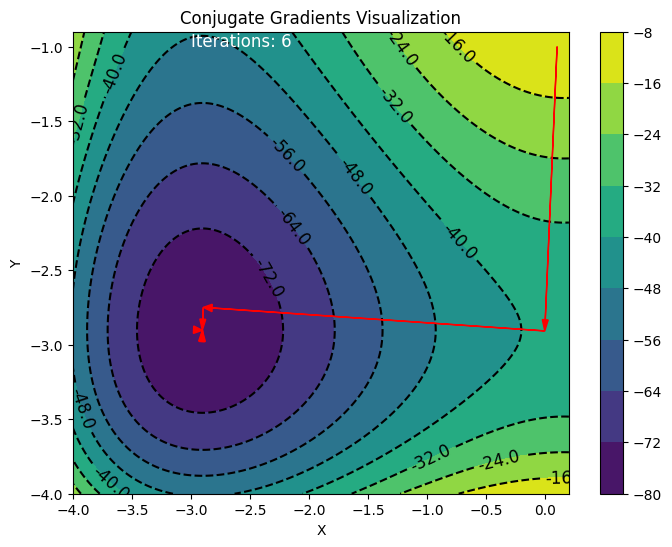

In [285]:
show_path(fletcher,(0.1,-1))

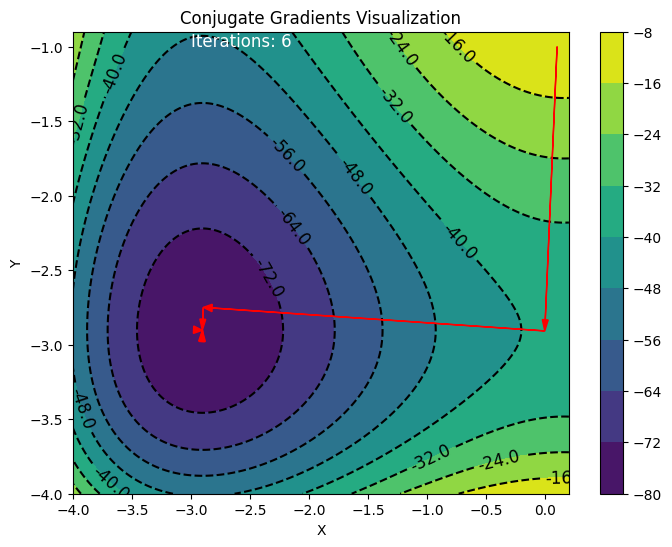

In [286]:
show_path(lui_story,(0.1,-1))

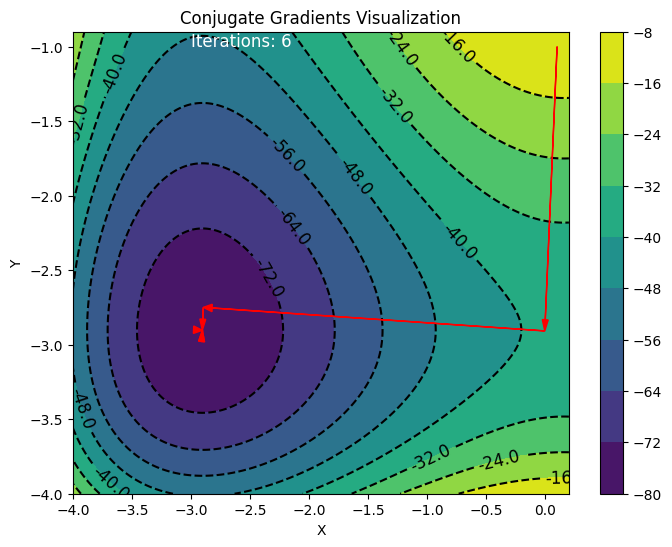

In [287]:
show_path(dy_uan,(0.1,-1))

C:\Users\Dmitriy Makarov\AppData\Local\Temp\ipykernel_3600\1785896567.py:20: RuntimeWarning: invalid value encountered in divide
  return max(0, np.dot(r_new-r-2*s*np.dot(r_new-r,r_new-r)/np.dot(s,r_new-r), r_new/np.dot(s,r_new-r)))
C:\Users\Dmitriy Makarov\AppData\Local\Temp\ipykernel_3600\1785896567.py:20: RuntimeWarning: divide by zero encountered in divide
  return max(0, np.dot(r_new-r-2*s*np.dot(r_new-r,r_new-r)/np.dot(s,r_new-r), r_new/np.dot(s,r_new-r)))


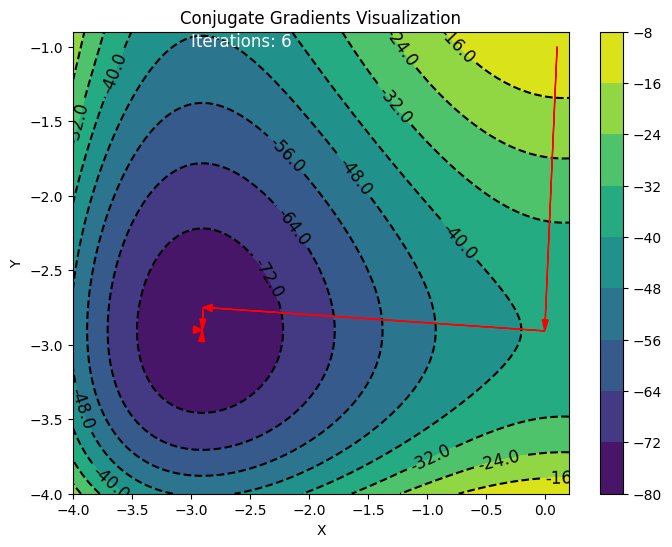

In [288]:
show_path(hager_jang,(0.1,-1))

Начальная точка $(0.1,-1.1)$

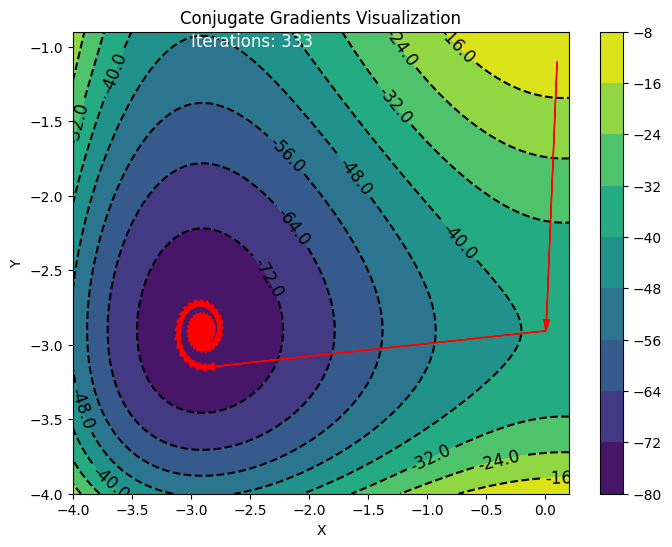

In [296]:
show_path(fletcher_reaves,(0.1,-1.1))

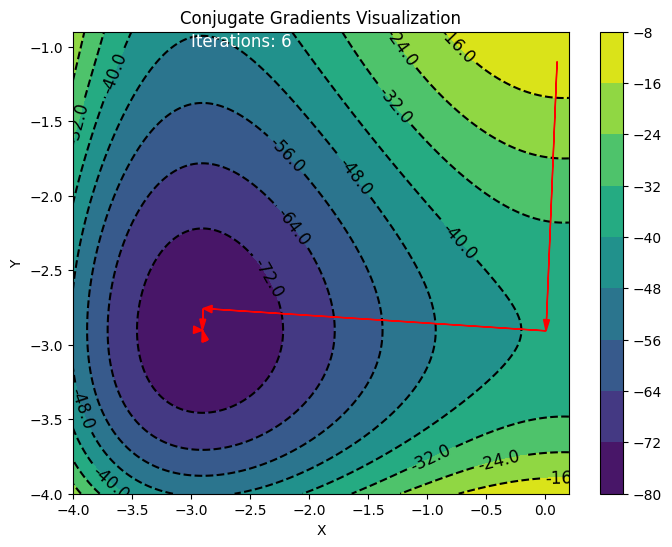

In [297]:
show_path(hestens_shtifel,(0.1,-1.1))

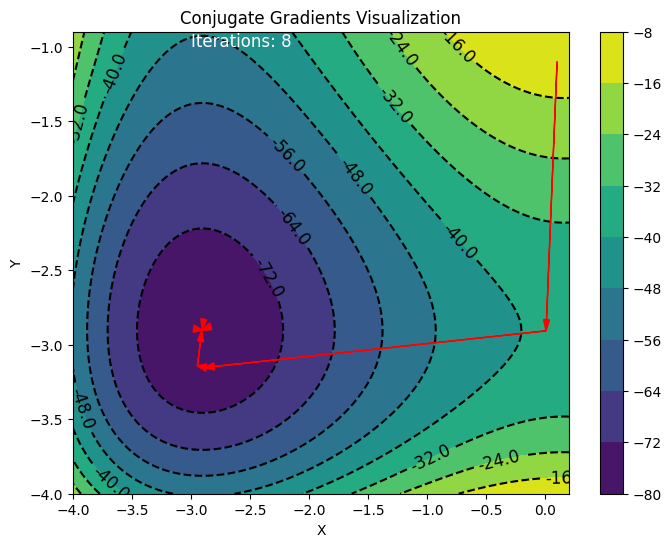

In [298]:
show_path(polak_ribier,(0.1,-1.1))

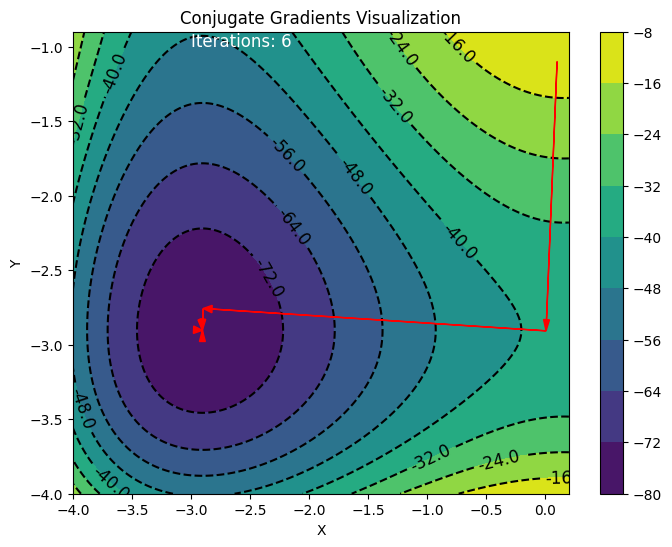

In [299]:
show_path(fletcher,(0.1,-1.1))

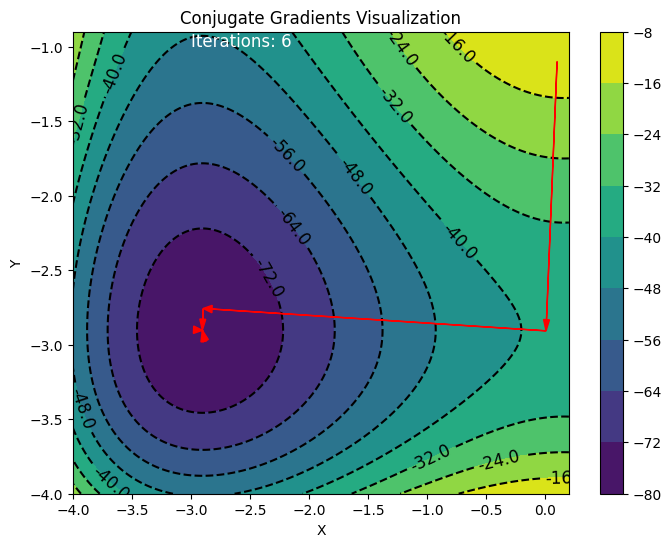

In [300]:
show_path(lui_story,(0.1,-1.1))

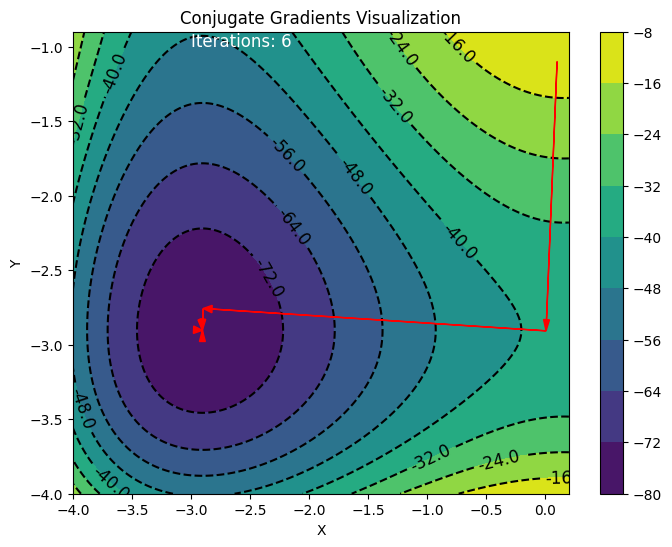

In [301]:
show_path(dy_uan,(0.1,-1.1))

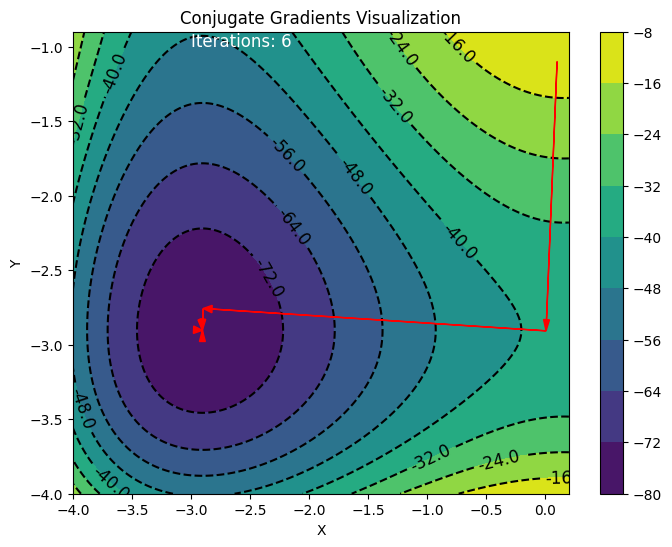

In [302]:
show_path(hager_jang,(0.1,-1.1))

Начальная точка $(0,-1)$

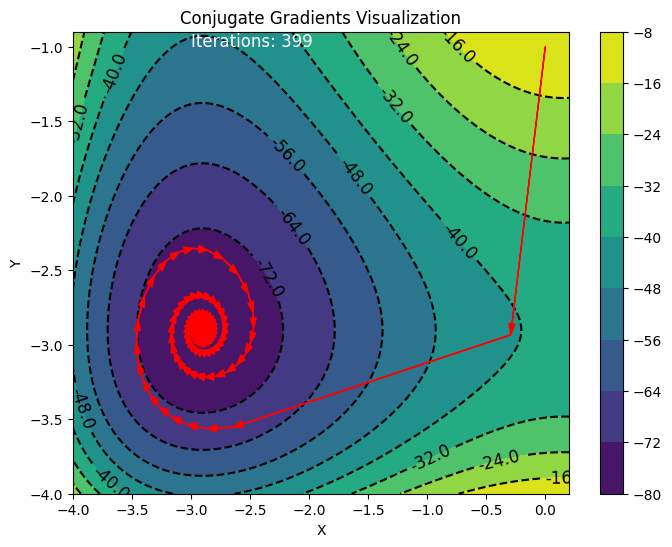

In [303]:
show_path(fletcher_reaves,(0,-1))

C:\Users\Dmitriy Makarov\AppData\Local\Temp\ipykernel_3600\1785896567.py:5: RuntimeWarning: invalid value encountered in scalar divide
  return max(0, np.dot(r_new,r_new-r)/np.dot(s,r_new-r))


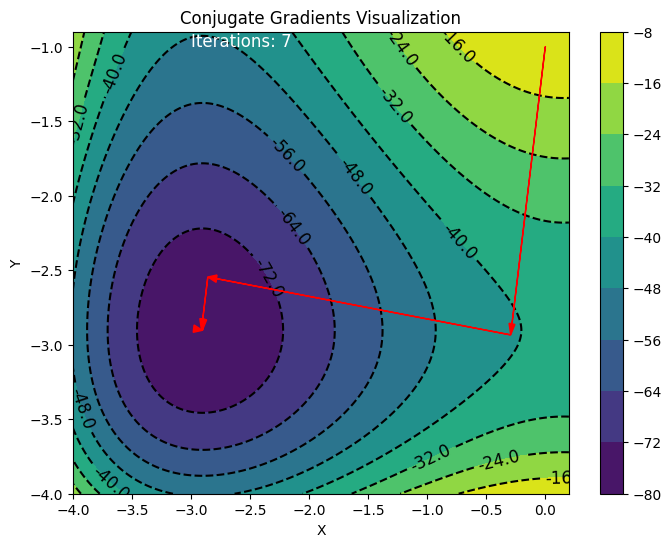

In [305]:
show_path(hestens_shtifel,(0,-1))

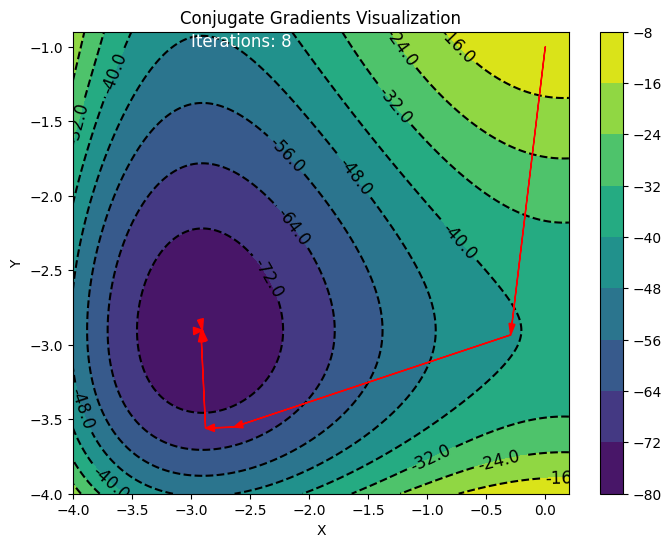

In [306]:
show_path(polak_ribier,(0,-1))

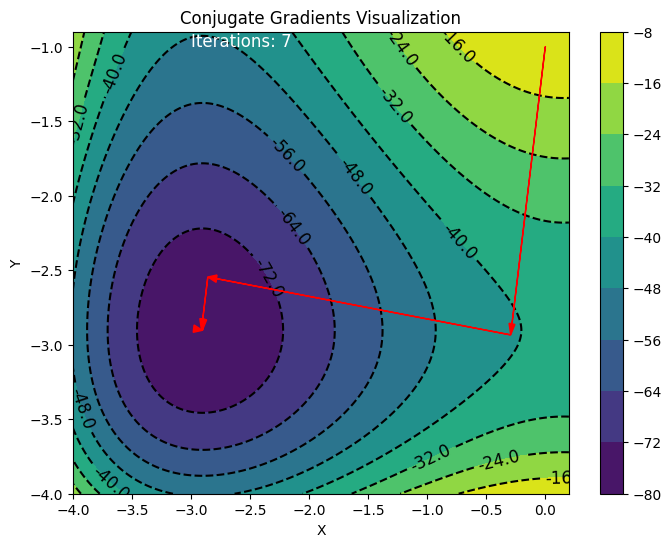

In [307]:
show_path(fletcher,(0,-1))

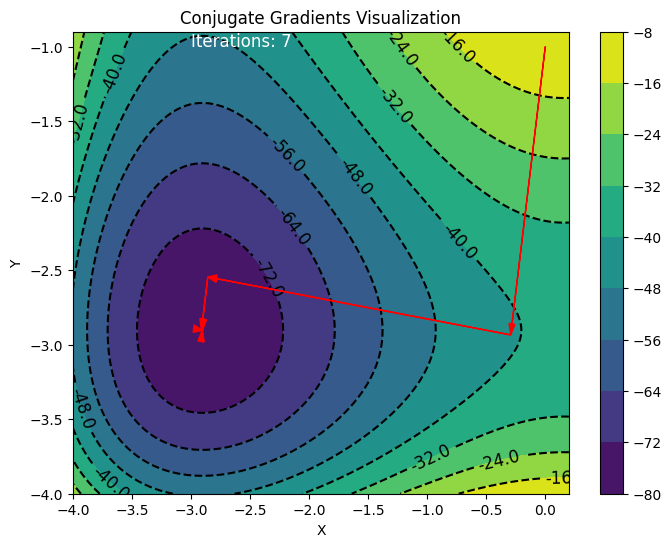

In [308]:
show_path(lui_story,(0,-1))

C:\Users\Dmitriy Makarov\AppData\Local\Temp\ipykernel_3600\1785896567.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  return max(0, np.dot(r_new,r_new)/np.dot(s,r_new-r))
C:\Users\Dmitriy Makarov\AppData\Local\Temp\ipykernel_3600\428334712.py:18: RuntimeWarning: invalid value encountered in multiply
  phi = lambda a: tang(x + a * S)
C:\Users\Dmitriy Makarov\AppData\Local\Temp\ipykernel_3600\428334712.py:2: RuntimeWarning: invalid value encountered in scalar subtract
  return (x[0]**4-16*x[0]**2+5*x[0]+x[1]**4-16*x[1]**2+5*x[1])/2
C:\Users\Dmitriy Makarov\AppData\Local\Temp\ipykernel_3600\428334712.py:29: RuntimeWarning: invalid value encountered in multiply
  S = r_new + beta * S


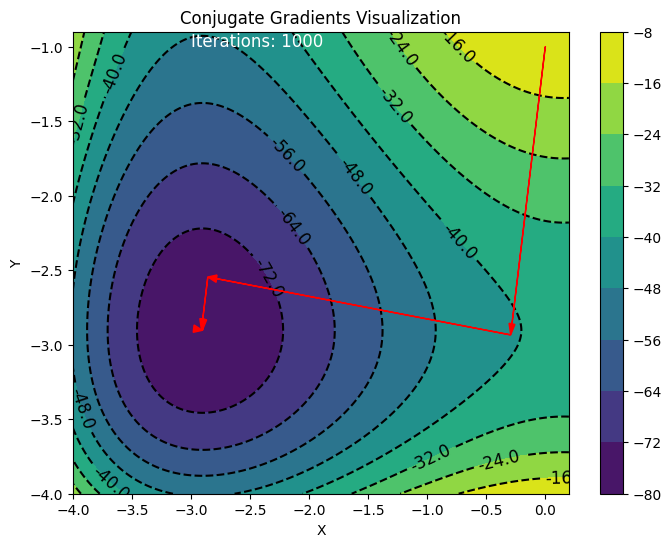

In [312]:
show_path(dy_uan,(0,-1))

C:\Users\Dmitriy Makarov\AppData\Local\Temp\ipykernel_3600\1785896567.py:20: RuntimeWarning: invalid value encountered in divide
  return max(0, np.dot(r_new-r-2*s*np.dot(r_new-r,r_new-r)/np.dot(s,r_new-r), r_new/np.dot(s,r_new-r)))
C:\Users\Dmitriy Makarov\AppData\Local\Temp\ipykernel_3600\1785896567.py:20: RuntimeWarning: divide by zero encountered in divide
  return max(0, np.dot(r_new-r-2*s*np.dot(r_new-r,r_new-r)/np.dot(s,r_new-r), r_new/np.dot(s,r_new-r)))


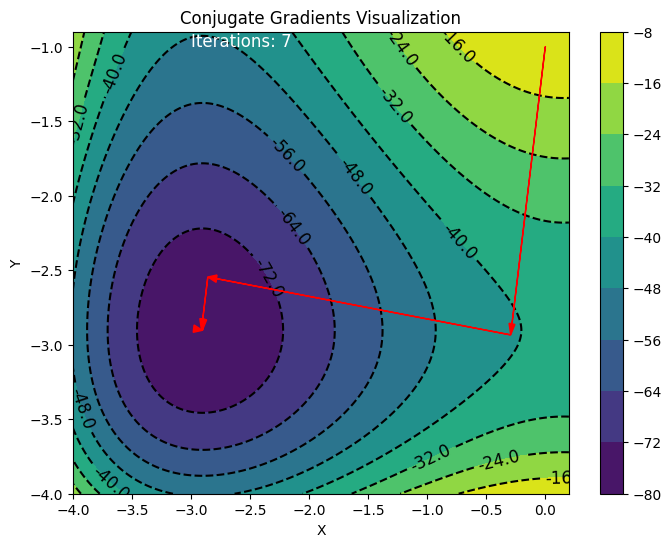

In [311]:
show_path(hager_jang,(0,-1))

In [318]:
import pandas as pd

results = pd.DataFrame({"Хестенс-Штифель": [6,6,7], "Флетчер-Ривз":[404,333,399], 
                        "Полак-Рибьер":[8,8,8], "Флетчер":[6,6,7], "Лиу-Стори":[6,6,7], 
                        "Дай-Юань":[6,6,1000], "Хагер-Жанг":[6,6,7]})

results.index = [(0.1,-1), (0.1,-1.1), (0,-1)]

results.loc['avg iterations'] = round(results.mean(),2)
results.loc['min iterations'] = round(results.min())
results.loc['max iterations'] = round(results.max())


results

,Хестенс-Штифель,Флетчер-Ривз,Полак-Рибьер,Флетчер,Лиу-Стори,Дай-Юань,Хагер-Жанг
"(0.1, -1)",6.00,404.00,8.0,6.00,6.00,6.00,6.00
"(0.1, -1.1)",6.00,333.00,8.0,6.00,6.00,6.00,6.00
"(0, -1)",7.00,399.00,8.0,7.00,7.00,1000.00,7.00
avg iterations,6.33,378.67,8.0,6.33,6.33,337.33,6.33
min iterations,6.00,333.00,8.0,6.00,6.00,6.00,6.00
max iterations,7.00,404.00,8.0,7.00,7.00,1000.00,7.00


Точнее всего (по количеству итераций) работают алгоритмы **Хестенса-Штифеля**, **Флетчера**, **Лиу-Стори** и **Хагера-Жанга**.

Наименее точен в среднем был алгоритм **Флетчера-Ривза**, однако при начальном условии $(0,-1)$ алгоритм **Дай-Юань** вообще не дал результата (превышен порог в 1000 итераций).

## **Задание 7 - Сопрягаемся на максималках**

Задаём начальную точку и квадратичную форму

In [370]:
size=8 # Размерность пространства

A_0 = np.random.random(size=(size, size))

A = A_0.T @ A_0

starting_point = np.random.rand(size).astype("float64")

In [342]:
def form(A,x):
    return np.dot(x, A @ x)

def grad(A,x):
    return np.dot((A.T+A),x)

Реализуем метод градиентного спуска

In [343]:

def gradient_descent(A, starting_point, alpha, epsilon=10**(-9), iter_max = 70000):
    x = starting_point
    iterations = 0
    steps = [x]

    r = -grad(A,x)
    n_grad = np.linalg.norm(r, ord=2)

    while iterations<iter_max and (n_grad > epsilon):
        x = x + alpha * r

        r = -grad(A,x)

        iterations += 1
        steps.append(x)

        n_grad = np.linalg.norm(r, ord=2)

    return x, iterations, np.array(steps)

Метод наискорейшего спуска

In [344]:
def rapid_descent(A,starting_point, alpha, epsilon = 10**(-9), iter_max = 70000):
    x = starting_point
    iterations = 0
    steps = [x]

    r = -grad(A,x)
    n_grad = np.linalg.norm(r, ord=2)

    while iterations<iter_max and (n_grad > epsilon):
        phi = lambda a : form(A,x + a * r)
        alpha = minimize_scalar(phi).x
        x = x + alpha * r

        r = -grad(A,x)
        n_grad = np.linalg.norm(r, ord=2)

        iterations += 1
        steps.append(x)

    return x, iterations, np.array(steps)

Метод покоординатного спуска

In [345]:
def coord_descent(A,starting_point, alpha, epsilon = 10**(-9), iter_max = 70000):
    x = starting_point.copy()
    iterations = 0
    steps = [x]

    flag = True

    while flag:
        zero_counter = 0
        for i in range(len(x)):

            r_i = - ((A.T+A) @ x)[i]

            if abs(r_i)<epsilon:
                zero_counter+=1
            x = x.copy()
            x[i] = x[i] + alpha * r_i
            iterations += 1
            steps.append(x)
            if iterations >= iter_max:
                flag=False
                break

        if zero_counter==len(x):
            break

    return x, iterations, np.array(steps)

In [346]:
def conjugate_gradients(A, starting_point, alpha, algorythm=hestens_shtifel, epsilon=10**(-9), iter_max = 70000):
    x = starting_point
    iterations = 0
    steps = [x]
    
    flag = 0

    r = -grad(A,x)
    S = r

    while iterations<iter_max:
        phi = lambda a: form(A,x + a * S)
        alpha = minimize_scalar(phi).x
        x_new = x + alpha * S

        r_new = -grad(A,x_new)
        
        beta = algorythm(r_new,r,S)
        
        if flag:
            beta = 0

        S = r_new + beta * S

        iterations += 1
        steps.append(x_new)

        if (np.linalg.norm(x_new - x) < epsilon):
            if flag:
                x = x_new
                break
            else:
                flag = 1
                x = x_new
                r = r_new
                continue

        flag = 0
            
        x = x_new
        r = r_new

    return x, iterations, np.array(steps)

In [371]:
starting_point

array([0.11533459, 0.82693861, 0.26866081, 0.00993619, 0.5654411 ,
       0.63234293, 0.21895987, 0.33537176])

In [372]:
x, n_iter, steps = gradient_descent(A, starting_point, 0.01)

n_iter, np.linalg.norm(x)

(70000, 5.087096334913055e-07)

In [373]:
x, n_iter, steps = rapid_descent(A, starting_point, 0.01)

n_iter,np.linalg.norm(x)

(14762, 4.1204032052232234e-08)

In [374]:
x, n_iter, steps = coord_descent(A, starting_point, 0.01)

n_iter,np.linalg.norm(x)

(70000, 0.04124123170790029)

In [375]:
x, n_iter, steps = conjugate_gradients(A,starting_point, 0.01)

n_iter,np.linalg.norm(x)

(12185, 6.189504673374225e-07)

**Вывод:** 

`Метод покоординатного спуска` оказался с отрывом наименее точным. Израсходовав все выделенные 70000 итераций он оказался заметно дальше от нуля (строгого минимума положительно определённой квадратичной формы), чем остальные методы.

`Метод градиентного спуска` также израсходовал все 70000 попыток, но оказался заметно ближе к нулю.

`Метод наискорейшего спуска` подобрался ближе всех к нулю, однако израсходовал на $\approx2000$ итераций больше, чем `метод сопряжённых градиентов` (14762 против 12185)